# Proyecto final

### Modelo de predicci ́on de falla cardíaca (HF prediction UdeA): Machine Learning en la prevención de enfermedades cardiovasculares.
### Vecinos mas cercanos KNN
### Funciones gaussianas
### Arboles Random Forest
### Maquina de soporte vectorial SVM
### Red neuronal artificial RNA

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### UdeA - Ude@

#### Profesor: Antonio Tamayo Herrera

### Estudiantes

Nombre: Omar Alberto Torres

CC:91220873

Nombre: Leidy Castaño Castaño

CC:1040753589

Nombre: Yuly Alvear Romo

CC:1128451152

Carlos Alfredo Pinto Hernández

CC: 1100953378

In [222]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pylab import hist, show
import seaborn as sb
from __future__ import division
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split # separar datos en entrenamiento y en prueba
from sklearn.model_selection import KFold
from scipy.stats import mode
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from sklearn.metrics import average_precision_score
from matplotlib.transforms import Transform
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import time
from matplotlib.transforms import Transform
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#import pandas_profiling

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.metrics import accuracy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import fbeta_score
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [223]:
#Se instala librería
!pip install mlxtend

***Función para selección de caracteristicas***

In [224]:

def select_features(modelo, n_features, fwd, fltg):
    
    sbs = SFS(modelo, 
           k_features=n_features, 
           forward=fwd,
           floating=fltg,
           verbose=1,
           scoring='accuracy',
           cv=0)
    
    return sbs


https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [225]:
datos = pd.read_csv('BddHearAlter.csv', sep =';')
#datos = pd.read_csv('BddHearLimpia.csv', sep =';')

Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

In [226]:
display(datos)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,15,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,M,TA,110,264,0,Normal,132,N,12,Flat,1
742,68,M,ASY,144,193,1,Normal,141,N,34,Flat,1
743,57,M,ASY,130,131,0,Normal,115,Y,12,Flat,1
744,57,F,ATA,130,236,0,LVH,174,N,0,Flat,1


In [227]:
datos.describe()  

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,5.517426,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,8.849546,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-1.000000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,1.000000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,8.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,62.000000,1.000000


In [228]:
X = pd.DataFrame(data={'edad':datos.Age,'RestinBP':datos.RestingBP,'Cholesterol':datos.Cholesterol, 'FastingBS':datos.FastingBS,'MaxHR':datos.MaxHR,'Oldpeak':datos.Oldpeak})


In [229]:
#np.where(datos['HeartDisease']==0)

In [230]:
age = list(datos['Age'].value_counts().index)
sex  = list(datos['Sex'].value_counts().index)
chestpaintype = list(datos['ChestPainType'].value_counts().index)
restingbp = list(datos['RestingBP'].value_counts().index)
cholesterol = list(datos['Cholesterol'].value_counts().index)
Fastingbs = list(datos['FastingBS'].value_counts().index)
restingecg= list(datos['RestingECG'].value_counts().index)
maxhr = list(datos['MaxHR'].value_counts().index)
exerciseangina = list(datos['ExerciseAngina'].value_counts().index)
oldpeak = list(datos['Oldpeak'].value_counts().index)
st_slope = list(datos['ST_Slope'].value_counts().index)
heartdisease = list(datos['HeartDisease'].value_counts().index)

In [231]:
display([[sex],[chestpaintype],[restingecg],[exerciseangina],[st_slope]])

[[['M', 'F']],
 [['ASY', 'NAP', 'ATA', 'TA']],
 [['Normal', 'LVH', 'ST']],
 [['N', 'Y']],
 [['Flat', 'Up', 'Down']]]

In [232]:
datos_categoricos = datos[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']].astype('category')


In [233]:
#datos = pd.read_csv('BD Heart Failure_Limpia.csv', sep =';')
vnumericas = datos.drop(["Sex","ChestPainType","RestingECG","ST_Slope","ExerciseAngina"],axis=1) #SE crea variable númerica sin las categoricas
vcategoricas=datos.filter(["Sex","ChestPainType","RestingECG","ST_Slope","ExerciseAngina"])   #DataSet de variables categóricas
vnumericas.head(100) 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0,0
1,49,160,180,0,156,1,1
2,37,130,283,0,98,0,0
3,48,138,214,0,108,15,1
4,54,150,195,0,122,0,0
...,...,...,...,...,...,...,...
95,58,130,263,0,140,2,1
96,43,142,207,0,138,0,0
97,39,160,147,1,160,0,0
98,56,120,85,0,140,0,0


In [234]:
vcategoricas

,Sex,ChestPainType,RestingECG,ST_Slope,ExerciseAngina
0,M,ATA,Normal,Up,N
1,F,NAP,Normal,Flat,N
2,M,ATA,ST,Up,N
3,F,ASY,Normal,Flat,Y
4,M,NAP,Normal,Up,N
...,...,...,...,...,...
741,M,TA,Normal,Flat,N
742,M,ASY,Normal,Flat,N
743,M,ASY,Normal,Flat,Y
744,F,ATA,LVH,Flat,N


In [235]:
cat_numerica=pd.get_dummies(vcategoricas,drop_first=False) 
cat_numerica.head(10)

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_N,ExerciseAngina_Y
0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0,1,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,1,0,0,1,1,0
3,1,0,1,0,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,1,0,0,0,1,1,0
5,0,1,0,0,1,0,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,0,0,0,1,1,0
7,0,1,0,1,0,0,0,1,0,0,0,1,1,0
8,0,1,1,0,0,0,0,1,0,0,1,0,0,1
9,1,0,0,1,0,0,0,1,0,0,0,1,1,0


In [236]:
#vnumericas.head(10)   

In [237]:
#datos=pd.concat([vnumericas,cat_numerica],axis=1)
datos=pd.concat([cat_numerica,vnumericas],axis=1)
datos

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,...,ST_Slope_Up,ExerciseAngina_N,ExerciseAngina_Y,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0,1,0,1,0,0,0,1,0,0,...,1,1,0,40,140,289,0,172,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,49,160,180,0,156,1,1
2,0,1,0,1,0,0,0,0,1,0,...,1,1,0,37,130,283,0,98,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,1,48,138,214,0,108,15,1
4,0,1,0,0,1,0,0,1,0,0,...,1,1,0,54,150,195,0,122,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0,1,0,0,0,1,0,1,0,0,...,0,1,0,45,110,264,0,132,12,1
742,0,1,1,0,0,0,0,1,0,0,...,0,1,0,68,144,193,1,141,34,1
743,0,1,1,0,0,0,0,1,0,0,...,0,0,1,57,130,131,0,115,12,1
744,1,0,0,1,0,0,1,0,0,0,...,0,1,0,57,130,236,0,174,0,1


In [238]:
print(np.shape(datos))

(746, 21)


In [239]:
pacientes = datos
pacientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sex_F              746 non-null    uint8
 1   Sex_M              746 non-null    uint8
 2   ChestPainType_ASY  746 non-null    uint8
 3   ChestPainType_ATA  746 non-null    uint8
 4   ChestPainType_NAP  746 non-null    uint8
 5   ChestPainType_TA   746 non-null    uint8
 6   RestingECG_LVH     746 non-null    uint8
 7   RestingECG_Normal  746 non-null    uint8
 8   RestingECG_ST      746 non-null    uint8
 9   ST_Slope_Down      746 non-null    uint8
 10  ST_Slope_Flat      746 non-null    uint8
 11  ST_Slope_Up        746 non-null    uint8
 12  ExerciseAngina_N   746 non-null    uint8
 13  ExerciseAngina_Y   746 non-null    uint8
 14  Age                746 non-null    int64
 15  RestingBP          746 non-null    int64
 16  Cholesterol        746 non-null    int64
 17  FastingBS       

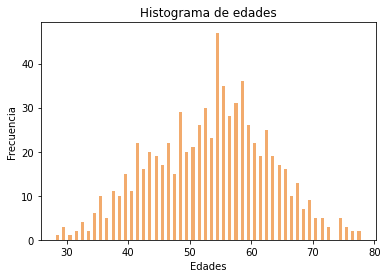

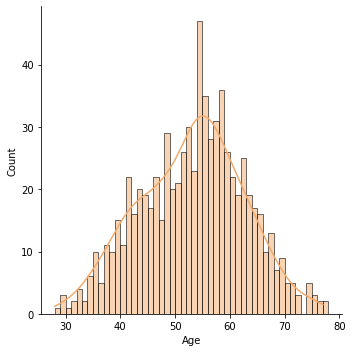

Se trabaja un intervalo de edades : range(28, 79)


In [240]:
pacientes =datos
intervalos = range(min(pacientes.Age), max(pacientes.Age) +2)
plt.hist(x=pacientes.Age, bins=intervalos, color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
sb.displot(pacientes.Age, color='#F2AB6D',bins = intervalos, kde=True) 
#plt.xticks(intervalos)
#edad =hist(pacientes.Age)
plt.show()
print("Se trabaja un intervalo de edades : " + str(intervalos))

Sex: sex of the patient [M: Male, F: Female]

RestingBP: resting blood pressure [mm Hg]

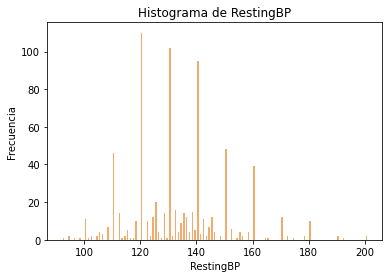

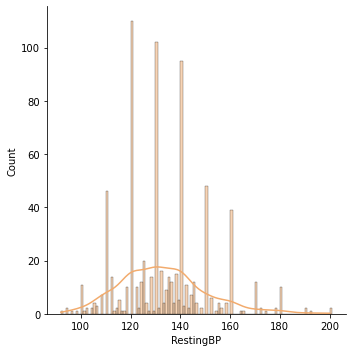

Se trabaja un intervalo de RestingBP : range(92, 202)


In [242]:
intervalos = range(min(pacientes.RestingBP), max(pacientes.RestingBP) +2)
plt.hist(x=pacientes.RestingBP, bins=intervalos, color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frecuencia')
#plt.xticks(intervalos)
sb.displot(pacientes.RestingBP, color='#F2AB6D',bins = intervalos, kde=True) 
plt.show()
print("Se trabaja un intervalo de RestingBP : " + str(intervalos))

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

ChestPain_Type-NAP

RestingECG_ST

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

ST_Slope_Flat

ST_Slope_UP

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Cholesterol: serum cholesterol [mm/dl]

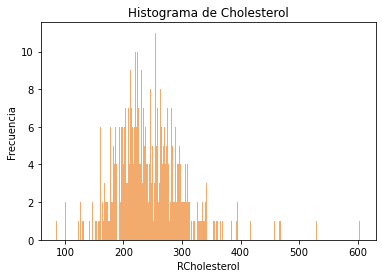

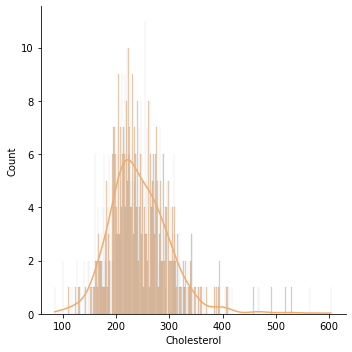

Se trabaja un intervalo de Cholesterol : range(85, 606)


In [251]:
intervalos = range(min(pacientes.Cholesterol), max(pacientes.Cholesterol) +3)
plt.hist(x=pacientes.Cholesterol, bins=intervalos, color='#F2AB6D', rwidth=1.5)
plt.title('Histograma de Cholesterol')
plt.xlabel('RCholesterol')
plt.ylabel('Frecuencia')
#plt.xticks(intervalos)
sb.displot(pacientes.Cholesterol, color='#F2AB6D',bins = intervalos, kde=True) 
plt.show()
print("Se trabaja un intervalo de Cholesterol : " + str(intervalos))

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

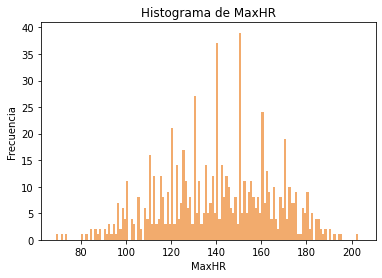

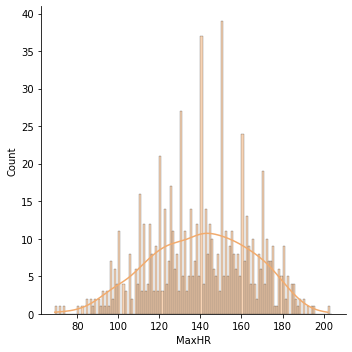

Se trabaja un intervalo de MaxHR : range(69, 205)


In [253]:
intervalos = range(min(pacientes.MaxHR), max(pacientes.MaxHR) +3)
plt.hist(x=pacientes.MaxHR, bins=intervalos, color='#F2AB6D', rwidth=1.5)
plt.title('Histograma de MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frecuencia')
#plt.xticks(intervalos)
sb.displot(pacientes.MaxHR, color='#F2AB6D',bins = intervalos, kde=True) 
plt.show()
print("Se trabaja un intervalo de MaxHR : " + str(intervalos))

Oldpeak: oldpeak = ST [Numeric value measured in depression]

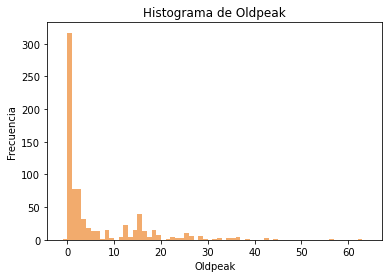

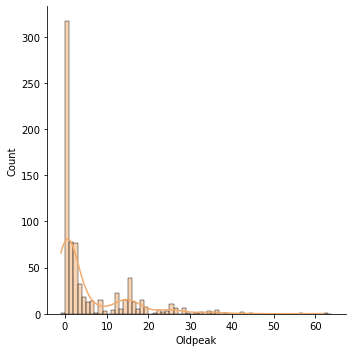

Se trabaja un intervalo de Oldpeak : range(-1, 65)


In [254]:
intervalos = range(min(pacientes.Oldpeak), max(pacientes.Oldpeak) +3)
plt.hist(x=pacientes.Oldpeak, bins=intervalos, color='#F2AB6D', rwidth=1.5)
plt.title('Histograma de Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frecuencia')
#plt.xticks(intervalos)
sb.displot(pacientes.Oldpeak, color='#F2AB6D',bins = intervalos, kde=True) 
plt.show()
print("Se trabaja un intervalo de Oldpeak : " + str(intervalos))

HeartDisease: output class [1: heart disease, 0: Normal]

Función calculo de error

In [256]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)
Accuracy = np.zeros(10)
kf = KFold(n_splits=10, shuffle=True)
kf.split(X)

<generator object _BaseKFold.split at 0x000001C55006FBA0>

**Calculo peso ponderado de la clase**

***Modelo KNN
https://qu4nt.github.io/sklearn-doc-es/modules/neighbors.html***

***Evaluación de caracteristicas KNN***

In [257]:
Caracteristicas = {
            0 : "Age", 
            1 : 'RestingBp',
            2 : 'Cholesterol',
            3 : 'FastingBs',
            4 : 'MaxHR',
            5 : 'Oldpeak',
            6 : 'Sex_F',
            7 : 'Sex_M',
            8 : 'ChesPaint_Type_ATA',
            9 : 'ChesPaint_Type_NAP',
            10 :'ChesPaint_Type_ASY',
            11 :'ChesPaint_Type_TA',
            12 :'RestingECG_Normal',
            13 :'RestingECG_ST',
            14 :'RestingECG_LVH',
            15 :'ST_Slope_Up',
            16 :'ST_Slope_Flat',
            17 :'ST_Slope_Down',
            18 :'ExerciseAngina_N',
            19 :'ExerciseAngina_Y',
          }

In [258]:
#SFS True, False
#SBS False, False
#SFFS  True,True
#SBFS  False, True
def  getMeBdd():
    pacientes = datos
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
#===================================================================================================================
X,Y = getMeBdd()
#Para calcular el costo computacional

tiempo_i = time.time()
s1 =0
s2=0
n_neighbors = 5
kf = KFold(n_splits=10, shuffle=True)
j=0
Errores = np.ones(10)
n_carac = 20
knn = KNeighborsClassifier(n_neighbors,algorithm ="auto",metric = "minkowski", weights="distance")

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 
    modelo = knn.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    sf = select_features(modelo,n_carac,False,True)
    sf = sf.fit(X_train,Y_train)
    Errores[j] = classification_error(Y_pred, Y_test)
    j+=1

print("\nNúmero de características: " ,n_carac)
print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")

 


Número de características:  20

Error de validación aplicando SFS: 0.1420720720720721 +/- 0.032873107272088885

Eficiencia en validación aplicando SFS: 0%


Tiempo total de ejecución: 0.1589970588684082 segundos.


***Variables seleccionadas***

In [259]:
#Función de selección(SVM + ) 
print('\nSequential Backward Selection (k=5):')
print(sf.k_feature_idx_)
print('CV Score:')
print(sf.k_score_)



Sequential Backward Selection (k=5):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
CV Score:
0


In [260]:
#Caracteristica del primer mejor modelo SVM + SBS)
for x in range(0,len(sf.k_feature_idx_)):
    print (Caracteristicas[sf.k_feature_idx_[x]])

Age
RestingBp
Cholesterol
FastingBs
MaxHR
Oldpeak
Sex_F
Sex_M
ChesPaint_Type_ATA
ChesPaint_Type_NAP
ChesPaint_Type_ASY
ChesPaint_Type_TA
RestingECG_Normal
RestingECG_ST
RestingECG_LVH
ST_Slope_Up
ST_Slope_Flat
ST_Slope_Down
ExerciseAngina_N
ExerciseAngina_Y


In [261]:
def  getMeBdd():
    pacientes = datos
    X = 0
    Y=0
    #X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
#===================================================================================================================
X,Y = getMeBdd()
#Para calcular el costo computacional

tiempo_i = time.time()
s1 =0
s2=0
n_neighbors = 5

#==================================================================================================================
#weights{‘uniform’, ‘distance’} or callable, default=’uniform’
#n_neighbors: numero de vecinos más cercanos
#algorithm :'auto', 'ball_tree', 'kd_tree', 'brute', en auto el algoritmo intenta determinar la mejor eleccion a partir de los datos
#weights{‘uniform’, ‘distance’} or callable, default=’uniform’; distance los valores más cercanos a un punto de muestra tendran mayor influencia en entreno
#metric : utilizado para determinar que calculo de distancia usar (Euclideana) se deja por defecto

kf = KFold(n_splits=10, shuffle=True)
X_train=0
X_test =0
Y_train =0
Y_test=0
s1=0
s2=0
j=0
Errores = np.ones(10)

knn = KNeighborsClassifier(n_neighbors,algorithm ="auto",metric = "minkowski", weights="distance")
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 
    modelo = knn.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    s1=modelo.score(X_test, Y_test)
    s2 =modelo.score(X_train, Y_train)
    acc =accuracy_score(Y_test, Y_pred)
    Errores[j] = classification_error(Y_pred, Y_test)
    j+=1
    
s1=knn.score(X_test, Y_test)
s2 =knn.score(X_train, Y_train)
classes = knn.predict(X_test)
acc =accuracy_score(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits =4, labels=[0,1]))

 

[[28 14]
 [ 6 26]]
              precision    recall  f1-score   support

           0     0.8235    0.6667    0.7368        42
           1     0.6500    0.8125    0.7222        32

    accuracy                         0.7297        74
   macro avg     0.7368    0.7396    0.7295        74
weighted avg     0.7485    0.7297    0.7305        74



***Error en la clasificacion Modelo Knn***

In [262]:
print("\nError de validación aplicando Knn: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.") 


Error de validación aplicando Knn: 0.23048648648648648 +/- 0.040589104046026336


Tiempo total de ejecución: 0.20262908935546875 segundos.


***Curva ROC Knn***



Tiempo total de ejecución: 0.23150300979614258 segundos.
Average_presicion_score 0.43243243243243246
Sin entrenar: ROC AUC=0.500
Algoritmo Knn: ROC AUC=0.740



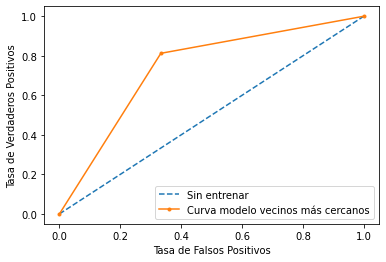

In [263]:
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)+ " segundos.")
#Curva ROC

classes = knn.predict(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs,average='weighted')
knn_auc = roc_auc_score(Y_test,classes,average='weighted')
aps = average_precision_score(Y_test, ns_probs)
print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo Knn: ROC AUC=%.3f' % (knn_auc))
knn_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
print()
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='Curva modelo vecinos más cercanos')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
print()

In [264]:
print()
print("Score de test " + str(s1*100))
print("Score de entrenamiento " + str(s2*100))
print("Accuracy_score "+str(acc*100))

#paciente_nuevo = scaler.transform([[63,1,3,145,233,1,0,150,0,23,0,0,1]])  #Prediccion
print()
#print("Predice clase del paciente "+str(knn.predict(paciente_nuevo)))
print()
#print("Predice por clase "+str(knn.predict_proba(paciente_nuevo)))
print()
#print(confusion_matrix(Y_test, classes))
#print()
#print(classification_report(Y_test, pred, digits =4, labels=[0,1]))



Score de test 72.97297297297297
Score de entrenamiento 100.0
Accuracy_score 72.97297297297297





***Diseño modelo:Funciones Gaussianas https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html***

***Seleccion de variables modelos con funciones gaussianas***

In [265]:
#SFS True, False
#SBS False, False
#SFFS  True,True
#SBFS  False, True
def  getMeBdd():
    pacientes = datos
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
#===================================================================================================================
X,Y = getMeBdd()

tiempo_i = time.time()
s1 =0
s2=0
n_neighbors = 10
kf = KFold(n_splits=10, shuffle=True)
j=0
Errores = np.ones(10)
n_carac =10
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,multi_class='one_vs_rest',random_state=2,n_restarts_optimizer=1,warm_start=True,n_jobs=2, copy_X_train=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 
    modelo = gpc.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    sf = select_features(modelo,n_carac,True,False)
    sf = sf = sf.fit(X_train,Y_train)
    Errores[j] = classification_error(Y_pred, Y_test)
    j+=1

print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   55.9s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   43.1s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  18 out of  18 |

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   43.6s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow e

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   30.7s finished
Features: 10/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   57.5s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   46.5s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   55.1s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   50.2s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid value encountered in double_scalars
  if lml - log_marginal_likelihood < 1e-10:
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: Runtim

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid value encountered in double_scalars
  if lml - log_marginal_likelihood < 1e-10:
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid value encountered in double_scalars
  if l

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   41.4s finished
Features: 7/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid value encountered in double_scalars
  if lml - log_marginal_likelihood < 1e-10:
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   44.9s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow e

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   52.2s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow e

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   40.8s finished
Features: 6/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid value encountered in double_scalars
  if lml - log_marginal_likelihood < 1e-10:
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflo

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid value encountered in double_scalars
  if lml - log_marginal_likelihood < 1e-10:
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:457: RuntimeWarning: invalid value encountered in double_scalars
  if lml - log_marginal_likelihood < 1e-10:
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   33.4s finished
Features: 7/10

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   42.0s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpc.py:451: RuntimeWarning: overflow e


Error de validación aplicando SFS: 0.13409009009009007 +/- 0.03961496365447463

Eficiencia en validación aplicando SFS: 89.58333333333334%


Tiempo total de ejecución: 4585.548021316528 segundos.


***Selección de variables***

In [266]:
#Función de selección(SVM + ) 
print('\nSequential Backward Selection (k=10):')
print(sf.k_feature_idx_)
print('CV Score:')
print(sf.k_score_)


Sequential Backward Selection (k=10):
(0, 1, 3, 4, 5, 6, 14, 16, 17, 18)
CV Score:
0.8958333333333334


In [267]:
#Caracteristica del primer mejor modelo SVM + SBS)
for x in range(0,len(sf.k_feature_idx_)):
    print (Caracteristicas[sf.k_feature_idx_[x]])

Age
RestingBp
FastingBs
MaxHR
Oldpeak
Sex_F
RestingECG_LVH
ST_Slope_Flat
ST_Slope_Down
ExerciseAngina_N


In [268]:
X=0
Y=0
pacientes =datos
def  getMeBdd():
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
X,Y = getMeBdd()

kernel = 1.0 * RBF(1.0)
#entrada = list([63,1,3,145,233,1,0,150,0,23,0,0,1])
#paciente_nuevo = scaler.transform([entrada])
#Kernel optimizador
#random_state determina la inicialización de los centrosrestars_optimizer: numero de reinicios del nucleo maximiza probabilidad log-marginal
#multi_class='one_vs_rest'
#n_jobsint, default=None  numero de trabajos en paralelo  (procesamiento)
# copy_X_trainbool, default=True, Si es True, se almacena una copia persistente de los datos de

#===================================================================================================================
#
kf = KFold(n_splits=10, shuffle=True)
X_train=0
X_test =0
Y_train =0
Y_test=0
s1=0
s2=0
j=0
Errores = np.ones(10)
gpc = GaussianProcessClassifier(kernel=kernel,multi_class='one_vs_rest',random_state=2,n_restarts_optimizer=1,warm_start=True,n_jobs=2, copy_X_train=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 
    #gpc = GaussianProcessClassifier(kernel=kernel,multi_class='one_vs_rest',random_state=2,n_restarts_optimizer=1,warm_start=True,n_jobs=2, copy_X_train=True).fit(X_train, Y_train)
    modelo = gpc.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    
    s1= modelo.score(X_test, Y_test)
    s2 = modelo.score(X_train, Y_train)
  
    Errores[j] = classification_error(Y_pred, Y_test)
    j = j+1
    
    print("--------------------------------------------------------------")
    print("Escore entrenamiento "+ str((s2)*100))
    print()
    print("Score para el test " + str((s1)*100))
    print("-------------------------------------------------------------")

print()


--------------------------------------------------------------
Escore entrenamiento 88.6736214605067

Score para el test 92.0
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 88.22652757078987

Score para el test 88.0
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 88.6736214605067

Score para el test 86.66666666666667
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 88.82265275707898

Score para el test 88.0
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 89.71684053651266

Score para el test 82.66666666666667
-------------------------------------------------------------
-------------------------------

***Curva ROC Funciones gaussianas***

Average_presicion_score 0.5
Sin entrenar: ROC AUC=0.500
Algoritmo funciónes gaussianas: ROC AUC=0.797




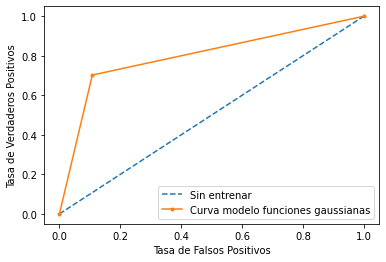

In [269]:
#CURVA ROC
classes = modelo.predict(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs,average='weighted')
modelo_auc = roc_auc_score(Y_test,classes,average='weighted')
aps = average_precision_score(Y_test, ns_probs)
print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo funciónes gaussianas: ROC AUC=%.3f' % (modelo_auc))
print()
modelo_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
modelo_fpr, modelo_tpr, _ = roc_curve(Y_test, modelo_probs)
print()
pyplot.plot(modelo_fpr, modelo_tpr, marker='.', label='Curva modelo funciones gaussianas')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
print()

***Metricas funciones gaussianas***

In [270]:
#print("Prediccion de un paciente nuevo "+ str(gpc.predict(paciente_nuevo)))
pred = modelo.predict(X_test)
print(confusion_matrix(Y_test, pred))
print()
print(classification_report(Y_test, pred, digits =4, labels=[0,1]))

print()
print("Score de test " + str(s1*100))
print("Score de entrenamiento " + str(s2*100))
#print("Accuracy_score "+str(acc*100))
print()


[[33  4]
 [11 26]]

              precision    recall  f1-score   support

           0     0.7500    0.8919    0.8148        37
           1     0.8667    0.7027    0.7761        37

    accuracy                         0.7973        74
   macro avg     0.8083    0.7973    0.7955        74
weighted avg     0.8083    0.7973    0.7955        74


Score de test 79.72972972972973
Score de entrenamiento 89.58333333333334



***Error en la clasificación modelo funciones gaussianas***

In [271]:
print("\nError de validación aplicando Knn: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.") 
print()


Error de validación aplicando Knn: 0.13414414414414413 +/- 0.032134694405431596


Tiempo total de ejecución: 4618.996499538422 segundos.



In [272]:
pacientes = datos
def  getMeBdd():
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
X,Y = getMeBdd()


***Seleccion de variables Modelo Random Forest***

In [273]:
#SFS True, False
#SBS False, False
#SFFS  True,True
#SBFS  False, True

kf = KFold(n_splits=10, shuffle=True)

Errores = np.ones(10)
classifier = RandomForestClassifier(n_estimators=5,criterion='gini',n_jobs=4, max_features ="sqrt",min_weight_fraction_leaf=0.0)
n_carac = 15
j =0
tiempo_i = time.time()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
    #classifier = RandomForestClassifier(n_estimators=5,criterion='gini',n_jobs=4, max_features ="sqrt",min_weight_fraction_leaf=0.0,class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})
    # Entrenar el modelo usando el conjunto de entranamiento
    modelo = classifier.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    sf = select_features(modelo,n_carac,False,True)
    sf = sf.fit(X_train,Y_train)
    Errores[j] = classification_error(Y_pred, Y_test)
    j = j+1

print("\nNúmero de características: " ,n_carac)  
print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.2s finished
Features: 19/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 18/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 17/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBac

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 17/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 16/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 15/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elaps


Número de características:  15

Error de validación aplicando SFS: 0.17427027027027026 +/- 0.033779127607064204

Eficiencia en validación aplicando SFS: 98.95833333333334%


Tiempo total de ejecución: 18.95934557914734 segundos.


***Variables seleccionadas***

In [274]:
#Función de selección(SVM + ) 
print('\nSequential Backward Selection (k=10):')
print(sf.k_feature_idx_)
print('CV Score:')
print(sf.k_score_)


Sequential Backward Selection (k=10):
(1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17)
CV Score:
0.9895833333333334


In [275]:
#Caracteristica del primer mejor modelo SVM + SBS)
for x in range(0,len(sf.k_feature_idx_)):
    print (Caracteristicas[sf.k_feature_idx_[x]])

RestingBp
Cholesterol
FastingBs
MaxHR
Oldpeak
Sex_M
ChesPaint_Type_ATA
ChesPaint_Type_NAP
ChesPaint_Type_ASY
ChesPaint_Type_TA
RestingECG_Normal
RestingECG_ST
RestingECG_LVH
ST_Slope_Up
ST_Slope_Down


In [276]:
pacientes = datos
def  getMeBdd():
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_M','ChestPainType_ATA','ChestPainType_ASY','ChestPainType_TA','RestingECG_Normal', 'RestingECG_LVH','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_Y']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
X,Y = getMeBdd()


In [277]:
kf = KFold(n_splits=10, shuffle=True)
j = 0
X_train=0
X_test =0
Y_train =0
Y_test=0
s1=0
s2=0
j =0
Errores = np.ones(10)
classifier = RandomForestClassifier(n_estimators=5,criterion='gini',n_jobs=4, max_features ="sqrt",min_weight_fraction_leaf=0.0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
    #classifier = RandomForestClassifier(n_estimators=5,criterion='gini',n_jobs=4, max_features ="sqrt",min_weight_fraction_leaf=0.0,class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})
    # Entrenar el modelo usando el conjunto de entranamiento
    modelo = classifier.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    
    Errores[j] = classification_error(Y_pred, Y_test)
    j = j+1
    
    s1=modelo.score(X_test, Y_test)
    s2 =modelo.score(X_train, Y_train)
    print("--------------------------------------------------------------")
    print("Escore entrenamiento "+ str((s2)*100))
    print()
    print("Score para el test " + str((s1)*100))
    print("-------------------------------------------------------------")
    

--------------------------------------------------------------
Escore entrenamiento 98.65871833084948

Score para el test 84.0
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 97.91356184798808

Score para el test 80.0
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 97.91356184798808

Score para el test 77.33333333333333
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 98.06259314456037

Score para el test 88.0
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 97.0193740685544

Score para el test 86.66666666666667
-------------------------------------------------------------
------------------------------


Average_presicion_score 0.5135135135135135
Sin entrenar: ROC AUC=0.500
Algoritmo Knn: ROC AUC=0.918




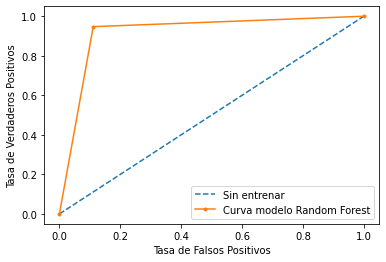

In [278]:
classes = classifier.predict(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs,average='weighted')
classifier_auc = roc_auc_score(Y_test,classes,average='weighted')
aps = average_precision_score(Y_test, ns_probs)
print()
print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo Knn: ROC AUC=%.3f' % (classifier_auc))
print()
classifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
classifier_fpr,classifier_tpr, _ = roc_curve(Y_test, classifier_probs)
print()
pyplot.plot(classifier_fpr,classifier_tpr, marker='.', label='Curva modelo Random Forest')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

***Metricas Random Forest***

In [279]:
print()
prediccion = classifier.predict(X_test)
print()
print(confusion_matrix(Y_test, prediccion))
print(classification_report(Y_test, prediccion, digits =4, labels=[0,1]))

pred = classifier.predict(X_test)
#print()
print(confusion_matrix(Y_test, pred))
print()
print(classification_report(Y_test, pred, digits =4, labels=[0,1]))

print()
print("Score de test " + str(s1*100))
print("Score de entrenamiento " + str(s2*100))
#print("Accuracy_score "+str(acc*100))

#paciente_nuevo = scaler.transform([[63,1,3,145,233,1,0,150,0,23,0,0,1]])  #Prediccion
print()
#print("Predice clase del paciente "+str(classfier.predict(paciente_nuevo)))
print()
#print("Predice por clase "+str(classfier.predict_proba(paciente_nuevo)))




[[32  4]
 [ 2 36]]
              precision    recall  f1-score   support

           0     0.9412    0.8889    0.9143        36
           1     0.9000    0.9474    0.9231        38

    accuracy                         0.9189        74
   macro avg     0.9206    0.9181    0.9187        74
weighted avg     0.9200    0.9189    0.9188        74

[[32  4]
 [ 2 36]]

              precision    recall  f1-score   support

           0     0.9412    0.8889    0.9143        36
           1     0.9000    0.9474    0.9231        38

    accuracy                         0.9189        74
   macro avg     0.9206    0.9181    0.9187        74
weighted avg     0.9200    0.9189    0.9188        74


Score de test 91.8918918918919
Score de entrenamiento 98.95833333333334




***Error clasificación Ramdom Forest***

In [280]:
print("\nError de validación aplicando Random forest: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.") 
print()


Error de validación aplicando Random forest: 0.16205405405405404 +/- 0.0479896777581752


Tiempo total de ejecución: 19.457630157470703 segundos.



***Máquina de soporte vectorial
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html***

In [281]:
pacientes =datos
#pacientes = pd.read_csv("heart.csv", sep = ";") # Falto colocar la separación entre cada dato
X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
Y_cabecera = pacientes['HeartDisease']
scaler = MinMaxScaler()
scaler.fit(X_cabecera)
pacientes_escalado =scaler.transform(X_cabecera)
Y = Y_cabecera
X=pacientes_escalado

***C: hiperparametro para penalizar el error
class_weight: Se calcula este hiperparametro para balancear las clases
kernel***

In [282]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {'kernel': ['linear'], 'C':[1, 100, 1000],
              'gamma': [1e-3, 1e-4]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, param_grid, cv=5)
clf.fit(X, Y)
df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                pd.DataFrame(clf.cv_results_["mean_test_score"],
                             columns=["Accuracy"])],axis=1)


***Selección de variables modelo SVM***

In [283]:
#SFS True, False
#SBS False, False
#SFFS  True,True
#SBFS  False, True
kf = KFold(n_splits=10, shuffle=True)
c=100

Errores = np.ones(10)
svclassifier = SVC(C=c,kernel="rbf", gamma=0.01, decision_function_shape ="ovr")
tiempo_i = time.time()
j =0
n_carac =15
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
  
    # Entrenar el modelo usando el conjunto de entranamiento
    modelo = svclassifier.fit(X_train, Y_train)
    Y_pred =modelo.predict(X_test)
    sf = select_features(modelo,n_carac,True,True)
    sf = sf.fit(X_train,Y_train)
    
    Errores[j] = classification_error(Y_pred, Y_test)
    j+=1
print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")       
print()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBacken

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 11/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished
Features: 12/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
Features: 13/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elaps

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 7/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 8/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 9/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished
Features: 14/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 15/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out o

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 11/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished
Features: 12/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
Features: 13/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elaps

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 6/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished
Features: 12/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
Features: 13/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished
Features: 14/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elaps


Error de validación aplicando SFS: 0.14079279279279278 +/- 0.037164336272739976

Eficiencia en validación aplicando SFS: 87.79761904761905%


Tiempo total de ejecución: 109.22987771034241 segundos.



***Variables seleccionadas***

In [284]:
#Función de selección(SVM + ) 
print('\nSequential Backward Selection (k=10):')
print(sf.k_feature_idx_)
print('CV Score:')
print(sf.k_score_)
print()


Sequential Backward Selection (k=10):
(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 16, 17, 18)
CV Score:
0.8779761904761905



In [285]:
#Caracteristica del primer mejor modelo SVM + SBS)
for x in range(0,len(sf.k_feature_idx_)):
    print (Caracteristicas[sf.k_feature_idx_[x]])
print()    

Age
RestingBp
Cholesterol
FastingBs
MaxHR
Oldpeak
Sex_F
ChesPaint_Type_NAP
ChesPaint_Type_ASY
ChesPaint_Type_TA
RestingECG_Normal
RestingECG_LVH
ST_Slope_Flat
ST_Slope_Down
ExerciseAngina_N



In [286]:
pacientes =datos
#pacientes = pd.read_csv("heart.csv", sep = ";") # Falto colocar la separación entre cada dato
X_cabecera = pacientes[['Age','RestingBP','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_TA','ChestPainType_ASY', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ExerciseAngina_N']]
Y_cabecera = pacientes['HeartDisease']
scaler = MinMaxScaler()
scaler.fit(X_cabecera)
pacientes_escalado =scaler.transform(X_cabecera)
Y = Y_cabecera
X=pacientes_escalado

In [287]:
kf = KFold(n_splits=10, shuffle=True)
s1 =0
s2=0
c=100
#class_weight='balanced'
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
#gamma{‘scale’, ‘auto’} or float, default=’scale’
#class_weightdict or ‘balanced’, default=None
#shirinking hiperparametro par optimizar tiempo de ejecución, código más rápido
#tol : Tolerancia criterio de parada

Errores = np.ones(10)
#svclassifier = SVC(C=c,kernel="rbf", gamma=0.0001,shrinking=True,tol =0.0001,cache_size=200,class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]},random_state=1,probability=False)
svclassifier = SVC(C=c,kernel="rbf", decision_function_shape ="ovr")
tiempo_i = time.time()
j =0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
  
    # Entrenar el modelo usando el conjunto de entranamiento
    modelo = svclassifier.fit(X_train, Y_train)
    Y_pred =modelo.predict(X_test)
    s1 = modelo.score(X_test, Y_test)
    s2 = modelo.score(X_train, Y_train)
    
    Errores[j] = classification_error(Y_pred, Y_test)
    j+=1
    print("--------------------------------------------------------------")
    print("Escore entrenamiento "+ str((s2)*100))
    print()
    print("Score para el test " + str((s1)*100))
    print("-------------------------------------------------------------")
print()

--------------------------------------------------------------
Escore entrenamiento 95.82712369597616

Score para el test 77.33333333333333
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 95.52906110283159

Score para el test 86.66666666666667
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 95.97615499254843

Score para el test 85.33333333333334
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 95.52906110283159

Score para el test 90.66666666666666
-------------------------------------------------------------
--------------------------------------------------------------
Escore entrenamiento 95.08196721311475

Score para el test 85.33333333333334
----------------------------------------------------

***Error validación maquina de soporte vectorial SVM***

In [288]:
print("\nError de validación aplicando SVM: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")
print()


Error de validación aplicando SVM: 0.15144144144144145 +/- 0.039143019297743595


Tiempo total de ejecución: 0.40344786643981934 segundos.



Average_presicion_score 0.5
Sin entrenar: ROC AUC=0.500
Algoritmo Vectores de soporte: ROC AUC=0.851




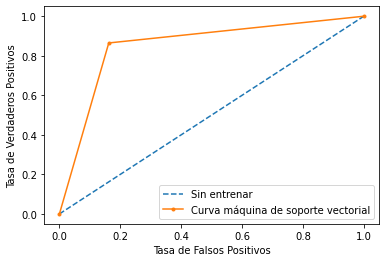

In [289]:
classes = modelo.predict(X_test)
ns_probs = [0 for _ in range(len(Y_test))]
ns_auc = roc_auc_score(Y_test, ns_probs,average='weighted')
modelo_auc = roc_auc_score(Y_test,classes,average='weighted')
aps = average_precision_score(Y_test, ns_probs)
print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo Vectores de soporte: ROC AUC=%.3f' % (modelo_auc))
print()
modelo_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
modelo_fpr, modelo_tpr, _ = roc_curve(Y_test, modelo_probs)
print()
pyplot.plot(modelo_fpr,modelo_tpr, marker='.', label='Curva máquina de soporte vectorial')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
print()

***Metricas maquina de soporte vectorial SVM***

In [290]:
#paciente_nuevo = scaler.transform([[63,1,3,145,233,1,0,150,0,23,0,0,1]])  
#prediccion_paciente = svclassifier.predict(paciente_nuevo)
#print("Prediccion de un paciente de entrada "+ str(prediccion_paciente))
print()
pred = modelo.predict(X_test)
print()
print(confusion_matrix(Y_test, pred))
print()
print(classification_report(Y_test, pred, digits =4, labels=[0,1]))
print()
print("Score de test " + str(s1*100))
print("Score de entrenamiento " + str(s2*100))



[[31  6]
 [ 5 32]]

              precision    recall  f1-score   support

           0     0.8611    0.8378    0.8493        37
           1     0.8421    0.8649    0.8533        37

    accuracy                         0.8514        74
   macro avg     0.8516    0.8514    0.8513        74
weighted avg     0.8516    0.8514    0.8513        74


Score de test 85.13513513513513
Score de entrenamiento 95.53571428571429


***Modelo con RNA***

***DataFrame***

In [291]:
pacientes= datos
#display(pacientes) # Observe como se esta representando ahora la base de datos

In [292]:
pacientes =datos
#pacientes = pd.read_csv("heart.csv", sep = ";") # Falto colocar la separación entre cada dato
X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
Y_cabecera = pacientes['HeartDisease']
scaler = MinMaxScaler()
scaler.fit(X_cabecera)
pacientes_escalado =scaler.transform(X_cabecera)
Y = Y_cabecera
X=pacientes_escalado


In [293]:
conteo_muestras_por_clase = Y.value_counts()
print(conteo_muestras_por_clase)

0    390
1    356
Name: HeartDisease, dtype: int64


In [294]:
#Para calcular el tiempo de ejecución del programa
tiempo_i = time.time()

In [295]:
print(np.shape(pacientes))

model = Sequential()
model.add(layers.Dense(10, kernel_initializer='uniform', input_shape=(20,)))
model.add(layers.Dense(5,activation="relu"))
model.add(layers.Dense(1, activation ="softmax"))


#model.add(layers.Dense(1, activation ="sigmoid"))
#opt = keras.optimizers.Adam(learning_rate=0.01)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
Optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)


(746, 21)


In [296]:
#Implemetamos la metodología de validación cross validation con 10 folds
Accuracy = np.zeros(20)
kf = KFold(n_splits=10, shuffle=True)
kf.split(X)

<generator object _BaseKFold.split at 0x000001C55686FBA0>

Código métricas del modelo

In [297]:
def ECM(Y_real,Y_est):
    N = np.size(Y_real)
    ecm = sum((Y_est - Y_real)**2)/N
    return ecm


In [298]:
def metrics(y_test, y_pred):
  '''
  Parametros:
    - lista (array) y_test (One-hot encoding)
    - lista (array) y_predichas (softmax vector)
  Return: 
    - F1
    - Recall
    - Precision
    - Accuracy
    - Especificity
  '''
  y_test = np.asarray(y_test)
  y_pred = np.asarray(y_pred)

  if y_test[0].shape[0] == 1:    #Biclase
    TP,TN,FP,FN = 0,0,0,0
    for t,p in zip(y_test,y_pred):
      if t==1:
        if p>=0.5: #yp==1:
          TP+=1
        else:
          FN+=1
      else:
        if p>=0.5: #yp==1:
          FP+=1
        else:
          TN+=1
    
    recall = TP/(TP+FN)
    prec = TP/(TP+FP)
    acc = (TP+TN)/(TP+FP+FN+TN)
    f1 = (2*recall*prec)/(recall+prec)
    esp = TN/(TN+FP)

    return f1, recall, prec, acc, esp
  
  else:    #Multiclase
    error = 0
    for test,pred in zip(y_test,y_pred):
        t = np.argmax(test)
        p = np.argmax(pred)
        if t!=p:
          error+=1
          
    err = error/np.shape(y_test)[0]     
    acc = 1 - err

    return acc


In [328]:
#   model.compile(loss='categorical_crossentropy', optimizer='adam')
X = np.asarray(X)
f1= []
X_test =0
y_test =0
y_pred =0
s1 =0
s2=0
j=0

Accuracy = np.zeros(10)
Errores = np.ones(20)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index] 
    
    model.compile(loss='binary_crossentropy', optimizer=Optimizer)
    model.fit(x = X_train, y = y_train, epochs=10)
    
    y_pred = model.predict(X_test)

    
    f1.append(fbeta_score(y_test.values, y_pred, beta = 1))
    pred = y_pred[0]
    Errores[j] = ECM(y_test, pred)
    j+=1
print()
#print("acc " +str(acc))
print("\nEficiencia en la clasificación: " + str(np.mean(f1)*100) + " +/- " + str(np.std(Errores)*100))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)+ " segundos.")




Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3092
Epoch 2/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3090
Epoch 3/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3090
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3087
Epoch 5/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3088
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 7/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3085
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3083
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3086
Epoch 10/10
3/3 [==============================] - 0s 1ms/step
Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3176
Epoch 2/10
21/21 [==============================] - 0s 1ms/step - loss: 0.3176
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - lo

21/21 [==============================] - 0s 1ms/step - loss: 0.2969
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 0.2966
Epoch 10/10
3/3 [==============================] - 0s 1ms/step


Eficiencia en la clasificación: 64.529885725924 +/- 23.986966048583376


Tiempo total de ejecución: 3250.1435651779175 segundos.


***Extracción de variables***

In [88]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)
#Accuracy = np.zeros(10)
#kf = KFold(n_splits=10, shuffle=True)
#kf.split(X)

***Función PCA***

In [89]:
def extract_features(tipo, n):
    
    if tipo == 'pca':
    
        ext = PCA(n_components=n)
    
        return ext

    elif tipo == 'lda':
        
        ext = LDA(n_discriminants=n)
        
        return ext
    
    else:
        print ("Ingrese un método válido (pca o lda)\n")


***Funciones finales para generar el modelo de vecinos más cercanos o KNN***

In [169]:
def  getMeBdd():
    pacientes = datos
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
   # X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ExerciseAngina_N']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
#===================================================================================================================
X,Y = getMeBdd()
#Para calcular el costo computacional

tiempo_i = time.time()
s1 =0
s2=0
n_neighbors = 5

#==================================================================================================================
#weights{‘uniform’, ‘distance’} or callable, default=’uniform’
#n_neighbors: numero de vecinos más cercanos
#algorithm :'auto', 'ball_tree', 'kd_tree', 'brute', en auto el algoritmo intenta determinar la mejor eleccion a partir de los datos
#weights{‘uniform’, ‘distance’} or callable, default=’uniform’; distance los valores más cercanos a un punto de muestra tendran mayor influencia en entreno
#metric : utilizado para determinar que calculo de distancia usar (Euclideana) se deja por defecto

kf = KFold(n_splits=10, shuffle=True)
X_train=0
X_test =0
Y_train =0
Y_test=0
s1=0
s2=0
j=0
Errores = np.ones(10)

knn = KNeighborsClassifier(n_neighbors,algorithm ="auto",metric = "minkowski", weights="distance")
for train_index, test_index in kf.split(X):
    #**********************************************************
    #Codigo que evalua reducción de caracteristicas con PCA
    ex = extract_features('pca',15)
    #Fit de PCA
    ex = ex.fit(X) #Complete el código con el fit correspondiente
    X_ex = ex.transform(X)#complete el código aquí para hacer la transformación
   
    #**********************************************************
    X_train, X_test = X_ex[train_index], X_ex[test_index]
    # X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 
    modelo = knn.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    s1=modelo.score(X_test, Y_test)
    s2 =modelo.score(X_train, Y_train)
    acc =accuracy_score(Y_test, Y_pred)
    Errores[j] = classification_error(Y_pred, Y_test)
    j+=1
    
s1=knn.score(X_test, Y_test)
s2 =knn.score(X_train, Y_train)
classes = knn.predict(X_test)
acc =accuracy_score(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits =4, labels=[0,1]))

[[30  7]
 [ 4 33]]
              precision    recall  f1-score   support

           0     0.8824    0.8108    0.8451        37
           1     0.8250    0.8919    0.8571        37

    accuracy                         0.8514        74
   macro avg     0.8537    0.8514    0.8511        74
weighted avg     0.8537    0.8514    0.8511        74



***Salida de valores errores de clasificación y costo de procesamiento***

In [170]:
print("\nError de validación aplicando Knn: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.") 


Error de validación aplicando Knn: 0.150018018018018 +/- 0.04174625075566496


Tiempo total de ejecución: 40.9635694026947 segundos.


In [172]:
print()
print("Score de test " + str(s1*100))
print("Score de entrenamiento " + str(s2*100))
print("Accuracy_score "+str(acc*100))


Score de test 85.13513513513513
Score de entrenamiento 100.0
Accuracy_score 85.13513513513513


***Modelo Random Forest***

In [94]:
pacientes = datos
def  getMeBdd():
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
X,Y = getMeBdd()

In [213]:
kf = KFold(n_splits=10, shuffle=True)
j = 0
X_train=0
X_test =0
Y_train =0
Y_test=0
s1=0
s2=0
j =0
Errores = np.ones(10)

#Quitar variables seleccionadas
classifier = RandomForestClassifier(n_estimators=5,criterion='gini',n_jobs=4, max_features ="sqrt",min_weight_fraction_leaf=0.0,class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})
for train_index, test_index in kf.split(X):
    #*************************************************************
    #Codigo que evalua reducción de caracteristicas con PCA
    ex = extract_features('pca',15)
    #Fit de PCA
    ex = ex.fit(X) #Complete el código con el fit correspondiente
    X_ex = ex.transform(X)#complete el código aquí para hacer la transformación
    
    #**************************************************************
    X_train, X_test = X_ex[train_index], X_ex[test_index]
    #X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    modelo = classifier.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    
    Errores[j] = classification_error(Y_pred, Y_test)
    j = j+1
    
    s1=modelo.score(X_test, Y_test)
    s2 =modelo.score(X_train, Y_train)


print(confusion_matrix(Y_test, Y_pred))
print()
print(classification_report(Y_test, Y_pred, digits =4, labels=[0,1]))
print("Score de test " + str(s1*100))
print("Score de entrenamiento " + str(s2*100))
#print("Accuracy_score "+str(acc*100))


[[30  5]
 [ 4 35]]

              precision    recall  f1-score   support

           0     0.8824    0.8571    0.8696        35
           1     0.8750    0.8974    0.8861        39

    accuracy                         0.8784        74
   macro avg     0.8787    0.8773    0.8778        74
weighted avg     0.8785    0.8784    0.8783        74

Score de test 87.83783783783784
Score de entrenamiento 97.32142857142857


***Error de clasificación Random Forest***

In [99]:
print("\nError de validación aplicando Random forest: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.") 
print()


Error de validación aplicando Random forest: 0.7506688042492551 +/- 0.38094795228258854


Tiempo total de ejecución: 0.9796290397644043 segundos.



***Maquina de soporte vectorial SVM***

**Construcción del dataSet para el modelo SVM**

In [214]:
pacientes =datos
X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
#X_cabecera = pacientes[['Age','RestingBP','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ST_Slope_Up','ExerciseAngina_N']]
Y_cabecera = pacientes['HeartDisease']
scaler = MinMaxScaler()
scaler.fit(X_cabecera)
pacientes_escalado =scaler.transform(X_cabecera)
Y = Y_cabecera
X=pacientes_escalado

***Análisis de hiperparametros modelo SVM***

In [217]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {'kernel': ['linear'], 'C':[1, 100, 1000],
              'gamma': [1e-3, 1e-4]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, param_grid, cv=5)
clf.fit(X, Y)
df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                pd.DataFrame(clf.cv_results_["mean_test_score"],
                             columns=["Accuracy"])],axis=1)
print(df)


      C   gamma  kernel  Accuracy
0     1  0.0010  linear  0.845790
1     1  0.0001  linear  0.845790
2   100  0.0010  linear  0.843114
3   100  0.0001  linear  0.843114
4  1000  0.0010  linear  0.843114
5  1000  0.0001  linear  0.843114


***Entrenamiento del modelo SVM***

In [254]:
kf = KFold(n_splits=10, shuffle=True)
s1 =0
s2=0
c=100
#class_weight='balanced'
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
#gamma{‘scale’, ‘auto’} or float, default=’scale’
#class_weightdict or ‘balanced’, default=None
#shirinking hiperparametro par optimizar tiempo de ejecución, código más rápido
#tol : Tolerancia criterio de parada

Errores = np.ones(10)
#svclassifier = SVC(C=c,kernel="rbf", gamma=0.0001,shrinking=True,tol =0.0001,cache_size=200,class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]},random_state=1,probability=False)
svclassifier = SVC(C=c,kernel="rbf", gamma=0.0001, decision_function_shape ="ovr")
tiempo_i = time.time()
j =0
for train_index, test_index in kf.split(X):
    #***************************************************************
    #Codigo que evalua reducción de caracteristicas con PCA
    ex= ex = extract_features('pca',5)
    #Fit de PCA
    ex = ex.fit(X) #Complete el código con el fit correspondiente
    X_ex = ex.transform(X)#complete el código aquí para hacer la transformación
    
    #***************************************************************
    X_train, X_test = X_ex[train_index], X_ex[test_index]
    
    #X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
  
    # Entrenar el modelo usando el conjunto de entranamiento
    modelo = svclassifier.fit(X_train, Y_train)
    Y_pred =modelo.predict(X_test)
    s1 = modelo.score(X_test, Y_test)
    s2 = modelo.score(X_train, Y_train)
    
    Errores[j] = classification_error(Y_pred, Y_test)
    j+=1

    

print(confusion_matrix(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred, digits =4, labels=[0,1]))

print("--------------------------------------------------------------")
print("Escore entrenamiento "+ str((s2)*100))
print()
print("Score para el test " + str((s1)*100))
print("-------------------------------------------------------------")
print()

[[33  2]
 [ 8 31]]
              precision    recall  f1-score   support

           0     0.8049    0.9429    0.8684        35
           1     0.9394    0.7949    0.8611        39

    accuracy                         0.8649        74
   macro avg     0.8721    0.8689    0.8648        74
weighted avg     0.8758    0.8649    0.8646        74

--------------------------------------------------------------
Escore entrenamiento 87.05357142857143

Score para el test 86.48648648648648
-------------------------------------------------------------



***Errore de validación y costo computacional modelo Knn***

In [105]:
print("\nError de validación aplicando SVM: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")
print()


Error de validación aplicando SVM: 0.13810810810810809 +/- 0.03983035611288066


Tiempo total de ejecución: 0.8191258907318115 segundos.



In [106]:
print("Score de test " + str(s1*100))
print("Score de entrenamiento " + str(s2*100))
print()

Score de test 83.78378378378379
Score de entrenamiento 87.20238095238095



**Modelo funciones de gauss**

In [107]:
X=0
Y=0
pacientes =datos
def  getMeBdd():
    X = 0
    Y=0
    X_cabecera = pacientes[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_F','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ASY','RestingECG_Normal', 'RestingECG_ST','RestingECG_LVH','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ExerciseAngina_N','ExerciseAngina_Y']]
    Y_cabecera = pacientes['HeartDisease']
    scaler = MinMaxScaler()
    scaler.fit(X_cabecera)
    pacientes_escalado =scaler.transform(X_cabecera) #Pendiente 
    Y = Y_cabecera
    X=pacientes_escalado
    return X, Y
X,Y = getMeBdd()

kernel = 1.0 * RBF(1.0)
#entrada = list([63,1,3,145,233,1,0,150,0,23,0,0,1])
#paciente_nuevo = scaler.transform([entrada])
#Kernel optimizador
#random_state determina la inicialización de los centrosrestars_optimizer: numero de reinicios del nucleo maximiza probabilidad log-marginal
#multi_class='one_vs_rest'
#n_jobsint, default=None  numero de trabajos en paralelo  (procesamiento)
# copy_X_trainbool, default=True, Si es True, se almacena una copia persistente de los datos de

#===================================================================================================================
#
kf = KFold(n_splits=10, shuffle=True)
X_train=0
X_test =0
Y_train =0
Y_test=0
s1=0
s2=0
j=0
Errores = np.ones(10)
gpc = GaussianProcessClassifier(kernel=kernel,multi_class='one_vs_rest',random_state=2,n_restarts_optimizer=1,warm_start=True,n_jobs=2, copy_X_train=True)
for train_index, test_index in kf.split(X):
    #*******************************************************************
    #Codigo que evalua reducción de caracteristicas con PCA
    ex= ex = extract_features('pca',15)
    #Fit de PCA
    ex = ex.fit(X) #Complete el código con el fit correspondiente
    X_ex = ex.transform(X)#complete el código aquí para hacer la transformación
    #*******************************************************************
    X_train, X_test = X_ex[train_index], X_ex[test_index]
    
    #X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 
    #gpc = GaussianProcessClassifier(kernel=kernel,multi_class='one_vs_rest',random_state=2,n_restarts_optimizer=1,warm_start=True,n_jobs=2, copy_X_train=True).fit(X_train, Y_train)
    modelo = gpc.fit(X_train, Y_train)
    Y_pred = modelo.predict(X_test)
    
    s1= modelo.score(X_test, Y_test)
    s2 = modelo.score(X_train, Y_train)
  
    Errores[j] = classification_error(Y_pred, Y_test)
    j = j+1
    print(confusion_matrix(Y_test, Y_pred))
    print()
    print(classification_report(Y_test, Y_pred, digits =4, labels=[0,1]))
print("--------------------------------------------------------------")
print("Escore entrenamiento "+ str((s2)*100))
print()
print("Score para el test " + str((s1)*100))
print("-------------------------------------------------------------")

print()


[[33  8]
 [ 4 30]]

              precision    recall  f1-score   support

           0     0.8919    0.8049    0.8462        41
           1     0.7895    0.8824    0.8333        34

    accuracy                         0.8400        75
   macro avg     0.8407    0.8436    0.8397        75
weighted avg     0.8455    0.8400    0.8403        75

[[24  7]
 [ 5 39]]

              precision    recall  f1-score   support

           0     0.8276    0.7742    0.8000        31
           1     0.8478    0.8864    0.8667        44

    accuracy                         0.8400        75
   macro avg     0.8377    0.8303    0.8333        75
weighted avg     0.8395    0.8400    0.8391        75

[[33  8]
 [ 4 30]]

              precision    recall  f1-score   support

           0     0.8919    0.8049    0.8462        41
           1     0.7895    0.8824    0.8333        34

    accuracy                         0.8400        75
   macro avg     0.8407    0.8436    0.8397        75
weighted avg  

***Error de clasificación Modelo funciones gaussianas***

In [108]:
print("\nError de validación aplicando Knn: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.") 


Error de validación aplicando Knn: 0.14210810810810814 +/- 0.033617590017352386


Tiempo total de ejecución: 32.07226371765137 segundos.
